### *DATA CHALLENGE 2024*
---
# **Classification of English Learner Proficiency**

## Run Each Time

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

First, let's install required packages where needed and import and use them :)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
#import os
#import re
import nltk
#import string
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/M2/DataChallenge/')


In [ ]:
import preprocessing

In [ ]:
data_file = '/content/drive/MyDrive/M2/DataChallenge/train_data.csv'
df = pd.read_csv(data_file, usecols=['text', 'level'])
df

,text,level
0,\r\r\n My friend Meg was going out to wor...,3
1,\r\r\n Hello I'm sorry but i'm on holiday...,0
2,\r\r\n Name : MaryAge : 62Hair color : bl...,0
3,"\r\r\n hi , my name is laila , i live in ...",0
4,\r\r\n A pink sweater : 10 $.A black dres...,0
...,...,...
20440,\r\r\n Hi mom and pop!I'm going to the po...,1
20441,"\r\r\n Hello, I don't know if the things ...",2
20442,\r\r\n I'm Ericka. I live in Paris .I get...,0
20443,"\r\r\n Hi, Jessy! You're on vacation, It'...",0


In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="dark")
sns.set(font_scale=1.85)

In [ ]:
def remove_punct(text):
    #new_text = word_tokenize(text)
    #new_text = list(filter(lambda token: token not in string.punctuation, new_text))
    #text = " ".join([word for word in new_text])
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_text = tokenizer.tokenize(text)
    text = " ".join([word for word in new_text])
    return text.strip()

def get_sentences(df, text_col, target_col):
    """Returns tuple of each document split by sentence with additional info:
    (sentence, number of words, average length of words, cefr_level, document id)

    Parameters
    ----------
    A dataframe: Pandas dataframe
    Name of text or document column: str
    Name of target column: str

    Returns
    -------
    A tuple
    (See Info Above)
    """
    sentences = []
    for row in df.itertuples():
        text = nltk.sent_tokenize(getattr(row, text_col).strip())
        level = getattr(row, target_col)
        doc = getattr(row, 'Index')
        for sentence in text:
            words = remove_punct(sentence).split()
            if len(words) == 0:
                avg_len_words = 0
            else:
                avg_len_words = sum(len(word) for word in words if len(word) > 0)/len(words)
            sentences.append((sentence, len(words), round(avg_len_words, 2) , level, doc))

    return sentences

In [ ]:
sent_df = get_sentences(df, 'text', 'level')
sent_df

[('My friend Meg was going out to work like every day.', 11, 3.64, 3, 0),
 ('When she was approaching the corner at Elm and Fourth, she saw a young couple get out of a car and suddenly began vandalizing the local news agents.',
  28,
  4.25,
  3,
  0),
 ('Meg decided to go over to them to see if she could get them to stop.',
  16,
  3.25,
  3,
  0),
 ('Suddenly the young woman came at her waving a gun!', 10, 4.0, 3, 0),
 ('She pushed the gun into her stomach, and started talking very fast about consumerism and the evils of the modern world.',
  21,
  4.62,
  3,
  0),
 ('Meg was shaking and terrified.', 5, 5.0, 3, 0),
 ('After what seemed like a lifetime, the vandal grabbed the laptop off her and run down the street.',
  18,
  4.33,
  3,
  0),
 ('A passer-by chased the vandal and caught her by the hair but she managed to escape.',
  17,
  3.88,
  3,
  0),
 ("This wasn't her hair but a wig and the woman was in fact a teenage boy!",
  17,
  3.18,
  3,
  0),
 ("They haven't caught the coup

In [ ]:
pd.DataFrame(sent_df)

,0,1,2,3,4
0,My friend Meg was going out to work like every...,11,3.64,3,0
1,When she was approaching the corner at Elm and...,28,4.25,3,0
2,Meg decided to go over to them to see if she c...,16,3.25,3,0
3,Suddenly the young woman came at her waving a ...,10,4.00,3,0
4,"She pushed the gun into her stomach, and start...",21,4.62,3,0
...,...,...,...,...,...
117049,I get up at eight .,5,2.60,0,20444
117050,"At ten o'clock, i go sport for my childrens.",10,3.30,0,20444
117051,"At one o'clock, i have Lunch on the fastfood.",10,3.40,0,20444
117052,"In afternoon, i play with my childrens.",7,4.43,0,20444


In [ ]:
# Break the Data Frame into pieces sentence-wise
sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,My friend Meg was going out to work like every...,11,3.64,3,0
1,When she was approaching the corner at Elm and...,28,4.25,3,0
2,Meg decided to go over to them to see if she c...,16,3.25,3,0
3,Suddenly the young woman came at her waving a ...,10,4.00,3,0
4,"She pushed the gun into her stomach, and start...",21,4.62,3,0
...,...,...,...,...,...
117049,I get up at eight .,5,2.60,0,20444
117050,"At ten o'clock, i go sport for my childrens.",10,3.30,0,20444
117051,"At one o'clock, i have Lunch on the fastfood.",10,3.40,0,20444
117052,"In afternoon, i play with my childrens.",7,4.43,0,20444


In [ ]:
# Examine the length of the readings by level:
# The chart below show the average number of words and length of the words per document

In [ ]:
sentence_df.groupby(['level', 'doc_id']).mean()

<ipython-input-13-cbc0778620cb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sentence_df.groupby(['level', 'doc_id']).mean()


num_of_words  avg_len_words
level doc_id                             
0     1          17.000000       3.450000
      2          12.500000       4.480000
      3          21.500000       3.585000
      4          62.000000       3.310000
      11          6.800000       3.742000
...                    ...            ...
5     17230       9.750000       4.118750
      17611      19.500000       4.723750
      17967      25.714286       4.744286
      18161      20.555556       4.563333
      18531      30.833333       4.111667

[20445 rows x 2 columns]

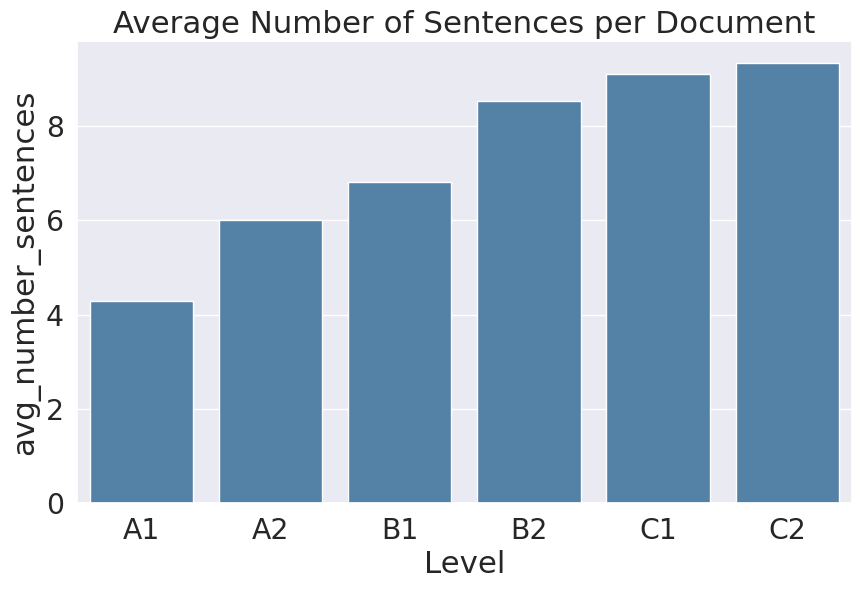

In [ ]:
avg = sentence_df.groupby(['level', 'doc_id']).count()['text'].groupby('level').mean()
df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], 'avg_number_sentences': avg})
# ax = df.plot.bar(x='Level', y='Avg Number of Sentences', rot=0).set(title='Average Number of Sentences per Document')
sns.barplot(data=df, x='Level', y='avg_number_sentences', color='steelblue')
plt.title(label='Average Number of Sentences per Document')
#plt.ylabel("", fontdict=font)
plt.show()

In [ ]:
avg_sentences = avg.tolist()
levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
x = range(6)
avg_sentences

[4.290258449304175,
 6.007346510407556,
 6.811080608934365,
 8.518497438816164,
 9.093833780160859,
 9.325]

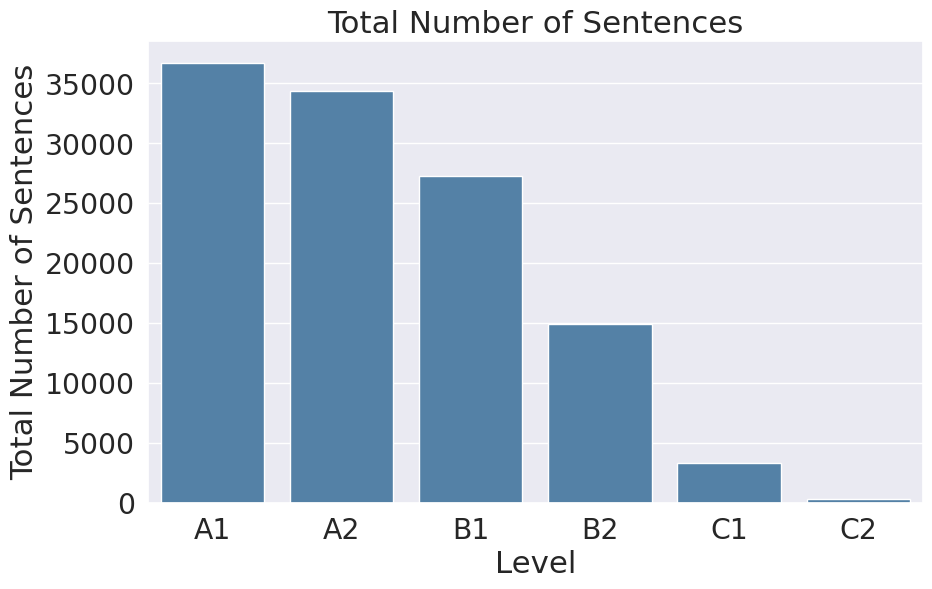

In [ ]:
avg = sentence_df.groupby(['level']).count()['text']
df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], 'Total Number of Sentences': avg})
sns.barplot(data=df, x='Level', y='Total Number of Sentences', color='steelblue')
plt.title(label='Total Number of Sentences')
plt.show()

<ipython-input-17-0b0fbacea128>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = sentence_df.groupby(['level']).mean()['num_of_words']


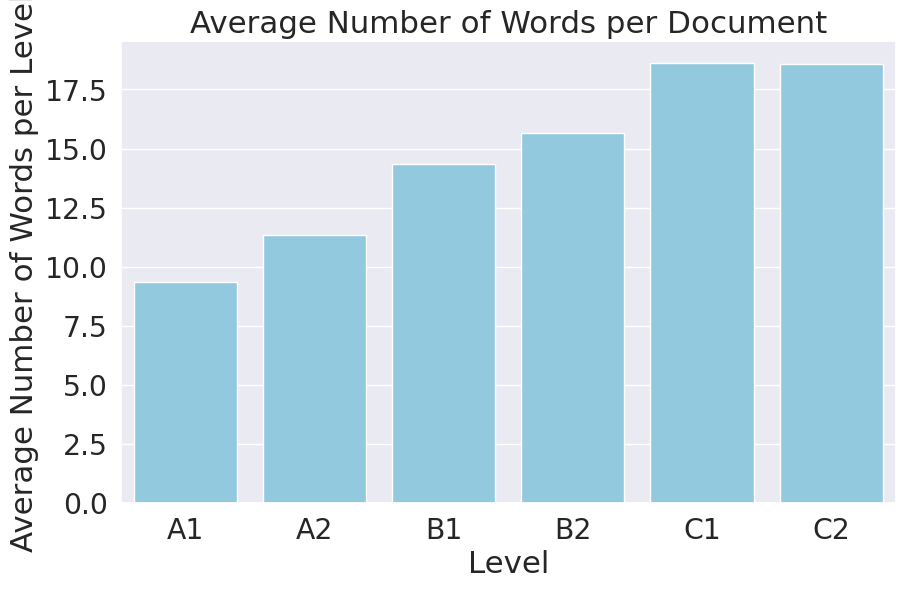

In [ ]:
avg = sentence_df.groupby(['level']).mean()['num_of_words']
df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], 'Average Number of Words per Level': avg})
sns.barplot(data=df, x='Level', y='Average Number of Words per Level', color='skyblue')
plt.title(label='Average Number of Words per Document')
plt.xlabel("Level")
plt.show()

## stastical approach

### External Data

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/M2/DataChallenge/olp-en-cefrj-master/cefrj-grammar-profile-20180315.csv')
df1

,ID,Shorthand Code,Grammatical Item,Sentence Type,CEFR-J Level,FREQ*DISP,Core Inventory,EGP,GSELO,Notes
0,1,PP.I_am,I am,AFF. DEC.,A1.1,A1,A1,A1,A1,NaN
1,1-1,PP.I_am_not,I am not,NEG. DEC.,A1.1,A1,A1,"A1-A2, C1",A1,NaN
2,1-2,PP.am_I,Am I ...?,AFF. INT.,NaN,NaN,A1,A1-A2,A1,文頭(相当)または接続詞直後の位置・疑問符で終わる文に限定
3,1-3,PP.am_I_not,Am I not ...?,NEG. INT.,NaN,NaN,A1,NaN,A1,文頭(相当)または接続詞直後の位置・疑問符で終わる文に限定
4,2,PP.you_are,You are,AFF. DEC.,B1.1,A1,A1,A1-A2,A1,文頭(相当)位置に限定
...,...,...,...,...,...,...,...,...,...,...
495,258,INTF.should_I,FUNCTIONAL QUESTION: Should I ...?,AFF. INT.,NaN,NaN,NaN,A2,NaN,文頭(相当)または接続詞直後の位置・疑問符で終わる文に限定
496,259,INTF.why_don't_you,FUNCTIONAL QUESTION: Why don't you ...?,NEG. INT.,NaN,NaN,NaN,"A2, B2",A2,文頭(相当)または接続詞直後の位置・疑問符で終わる文に限定
497,260,INTF.why_don't__we,FUNCTIONAL QUESTION: Why don't we ...?,NEG. INT.,NaN,NaN,NaN,"A2, B2",A2,文頭(相当)または接続詞直後の位置・疑問符で終わる文に限定
498,261,INTF.why_not,FUNCTIONAL QUESTION: Why not ...?,NEG. INT.,NaN,NaN,NaN,NaN,A2,文頭(相当)または接続詞直後の位置・疑問符で終わる文に限定


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/M2/DataChallenge/olp-en-cefrj-master/cefrj-vocabulary-profile-1.5.csv")
df2

,headword,pos,CEFR,CoreInventory 1,CoreInventory 2,Threshold
0,a,determiner,A1,NaN,NaN,NaN
1,a.m./A.M./am/AM,adverb,A1,NaN,NaN,NaN
2,abandon,verb,B1,NaN,NaN,NaN
3,abandoned,adjective,B2,NaN,NaN,NaN
4,ability,noun,A2,NaN,NaN,NaN
...,...,...,...,...,...,...
7794,zebra,noun,B2,NaN,NaN,NaN
7795,zip,noun,B2,NaN,NaN,NaN
7796,zone,noun,A2,Nationalities and countries,NaN,Places
7797,zoo,noun,A1,NaN,NaN,Places


In [ ]:
df3=pd.read_csv("/content/drive/MyDrive/M2/DataChallenge/olp-en-cefrj-master/octanove-vocabulary-profile-c1c2-1.0.csv")
df3

,headword,pos,CEFR,notes
0,exterior,noun,C1,NaN
1,cloak,noun,C1,NaN
2,timid,adjective,C1,NaN
3,reluctantly,adverb,C1,NaN
4,complexity,noun,C1,NaN
...,...,...,...,...
2131,unexceptional,adjective,C2,NaN
2132,inexorable,adjective,C2,NaN
2133,inexorably,adverb,C2,NaN
2134,inexorability,noun,C2,NaN


In [ ]:
sentence_df.loc[0]

text             My friend Meg was going out to work like every...
num_of_words                                                    11
avg_len_words                                                 3.64
level                                                            3
doc_id                                                           0
Name: 0, dtype: object

In [ ]:
import importlib
importlib.reload(preprocessing)

<module 'preprocessing' from '/content/drive/MyDrive/M2/DataChallenge/preprocessing.py'>

In [ ]:
vocab_dict = preprocessing.get_cefr_word_dictionary()
adv_vocab_dict = preprocessing.get_cefr_word_dictionary_adv()

In [ ]:
vocab_dict

{'a': 'A1',
 'a.m.': 'A1',
 'A.M.': 'A1',
 'am': 'A1',
 'AM': 'A1',
 'abandon': 'B1',
 'abandoned': 'B2',
 'ability': 'A2',
 'able': 'B1',
 'abnormal': 'B1',
 'abnormally': 'B2',
 'aboard': 'B1',
 'abolish': 'B2',
 'aboriginal': 'B2',
 'aborigine': 'B1',
 'about': 'A1',
 'above': 'A1',
 'abroad': 'A2',
 'abruptly': 'B2',
 'absence': 'B1',
 'absent': 'B1',
 'absentee': 'B2',
 'absolute': 'B1',
 'absolutely': 'B1',
 'absorb': 'B1',
 'abstract': 'B1',
 'absurd': 'B2',
 'abundance': 'B1',
 'abundant': 'B1',
 'abuse': 'B2',
 'academic': 'B1',
 'academy': 'B1',
 'accent': 'B1',
 'accept': 'A2',
 'acceptable': 'A2',
 'acceptance': 'B1',
 'access': 'B2',
 'accessibility': 'B2',
 'accessible': 'B1',
 'accessory': 'B1',
 'accident': 'A2',
 'accidental': 'B1',
 'accidentally': 'B1',
 'accommodation': 'B2',
 'accompany': 'B1',
 'accomplish': 'B1',
 'according to': 'B1',
 'accordingly': 'B2',
 'account': 'B1',
 'accountant': 'B1',
 'accumulate': 'B2',
 'accuracy': 'B1',
 'accurate': 'B1',
 'accurat

In [ ]:
adv_vocab_dict

{'exterior': 'C1',
 'cloak': 'C1',
 'timid': 'C1',
 'reluctantly': 'C1',
 'complexity': 'C1',
 'concur': 'C1',
 'avid': 'C1',
 'marvel': 'C2',
 'wing': 'C1',
 'enviable': 'C1',
 'organizational': 'C1',
 'psychiatrist': 'C1',
 'psychiatric': 'C1',
 'clinical': 'C1',
 'corps': 'C1',
 'forensic': 'C1',
 'juvenile': 'C1',
 'jurisdiction': 'C1',
 'accustomed': 'C1',
 'trauma': 'C1',
 'traumatic': 'C1',
 'constraint': 'C1',
 'revealing': 'C1',
 'eccentric': 'C1',
 'sanctity': 'C1',
 'conform': 'C1',
 'norms': 'C1',
 'quirk': 'C2',
 'oddity': 'C1',
 'compel': 'C1',
 'compulsion': 'C1',
 'conceive': 'C1',
 'conceivable': 'C1',
 'assertion': 'C1',
 'individuality': 'C1',
 'psyche': 'C1',
 'conformity': 'C1',
 'unconventional': 'C1',
 'congregate': 'C1',
 'rally': 'C1',
 'resent': 'C1',
 'self-conscious': 'C1',
 'wary': 'C1',
 'stoke': 'C1',
 'dynamically': 'C1',
 'hostess': 'C1',
 'perpetuate': 'C1',
 'naturalness': 'C1',
 'exhibitionist': 'C2',
 'isolate': 'C1',
 'isolated': 'C1',
 'humble': '

In [ ]:
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,My friend Meg was going out to work like every...,11,3.64,3,0
1,When she was approaching the corner at Elm and...,28,4.25,3,0
2,Meg decided to go over to them to see if she c...,16,3.25,3,0
3,Suddenly the young woman came at her waving a ...,10,4.00,3,0
4,"She pushed the gun into her stomach, and start...",21,4.62,3,0
...,...,...,...,...,...
117049,I get up at eight .,5,2.60,0,20444
117050,"At ten o'clock, i go sport for my childrens.",10,3.30,0,20444
117051,"At one o'clock, i have Lunch on the fastfood.",10,3.40,0,20444
117052,"In afternoon, i play with my childrens.",7,4.43,0,20444


In [ ]:
import preprocessing as pp
cefr_levels_df = pp.get_word_level_dataframe(sentence_df, 'text', vocab_dict, adv_vocab_dict)
#pp.get_word_level_dataframe(sentence_df, "text",  )

In [ ]:
cefr_levels_df

,A1,A2,B1,B2,C1,C2
0,10,0,0,0,0,0
1,18,4,1,2,0,0
2,14,1,0,0,0,0
3,6,1,1,0,0,0
4,16,3,1,1,0,0
...,...,...,...,...,...,...
117049,5,0,0,0,0,0
117050,7,0,0,0,0,0
117051,6,1,0,0,0,0
117052,5,0,0,0,0,0


from matplotlib import pyplot as plt
cefr_levels_df['A1'].plot(kind='hist', bins=20, title='A1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df['A2'].plot(kind='hist', bins=20, title='A2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df['B1'].plot(kind='hist', bins=20, title='B1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df['B2'].plot(kind='hist', bins=20, title='B2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df.plot(kind='scatter', x='A1', y='A2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df.plot(kind='scatter', x='A2', y='B1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df.plot(kind='scatter', x='B1', y='B2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df.plot(kind='scatter', x='B2', y='C1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df['A1'].plot(kind='line', figsize=(8, 4), title='A1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df['A2'].plot(kind='line', figsize=(8, 4), title='A2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df['B1'].plot(kind='line', figsize=(8, 4), title='B1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cefr_levels_df['B2'].plot(kind='line', figsize=(8, 4), title='B2')
plt.gca().spines[['top', 'right']].set_visible(False)

### RoberTa

In [ ]:
class ModelCreation():
    def __init__(self, model, name, version, tokenizer, optimizer, sentences = False, epochs = 5, batch_size = 3, padding = True, truncation = True, MAX_LEN = 256) :
        self.model = model
        self.name = name
        self.version = version
        self.tokenizer = tokenizer
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.padding = padding
        self.truncation = truncation
        self.MAX_LEN = MAX_LEN
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.sentences = sentences

    def fit(self, train_dataset):
        self.train_dataset = train_dataset

        # Séparation inputs/labels
        if self.sentences :
            sent_df = pp.get_sentences(self.train_dataset, 'text', 'level')
            sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
            indices_to_drop = sentence_df[sentence_df['num_of_words'] < 2].index
            sentence_df.drop(indices_to_drop, inplace=True)
            self.texts = sentence_df.text.values.tolist()
            self.labels = sentence_df.level.values.tolist()
            self.doc_ids = sentence_df.doc_id.values.tolist()
            self.combined_data = combined_data = list(zip(self.texts, self.labels, self.doc_ids))
        else :
            self.train_dataset['text'] = self.train_dataset['text'].str.strip('\r\r\n')
            self.texts = self.train_dataset.text.values.tolist()
            self.labels = self.train_dataset.level.values.tolist()
            self.combined_data = combined_data = list(zip(self.texts, self.labels))

        self.train_data, self.val_data = train_test_split(self.combined_data, test_size=0.2, random_state=42)

        if self.sentences :
            self.train_texts, self.train_labels, self.train_doc_ids = zip(*self.train_data)
            self.val_texts, self.val_labels, self.val_doc_ids = zip(*self.val_data)
        else :
            self.train_texts, self.train_labels = zip(*self.train_data)
            self.val_texts, self.val_labels = zip(*self.val_data)

        # tokenize inputs
        self.train_inputs = self.tokenizer(self.train_texts,
                                           return_tensors="pt",
                                           truncation=self.truncation,
                                           padding=self.padding,
                                           max_length = self.MAX_LEN)
        self.val_inputs = self.tokenizer(self.val_texts,
                                           return_tensors="pt",
                                           truncation=self.truncation,
                                           padding=self.padding,
                                           max_length = self.MAX_LEN)


        # Convert labels to PyTorch tensor
        self.train_labels = torch.tensor(self.train_labels)
        self.val_labels = torch.tensor(self.val_labels)

        # TensorDataset and Dataloader
        self.train_dataset = TensorDataset(self.train_inputs["input_ids"], self.train_inputs["attention_mask"], self.train_labels)
        self.train_dataloader = DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=False)

        # Create a DataLoader for the test set
        self.val_dataset = TensorDataset(self.val_inputs["input_ids"], self.val_inputs["attention_mask"], self.val_labels)
        self.val_dataloader = DataLoader(self.val_dataset, batch_size=self.batch_size, shuffle=False)

    def train(self):

        # Set model to device
        self.model.to(self.device)

        # Training
        for epoch in range(1,self.epochs+1):
            # Set model to training mode
            self.model.train()

            total_loss = 0
            progress_bar = tqdm(enumerate(self.train_dataloader), total=len(self.train_dataloader), desc=f'Epoch {epoch}/{self.epochs}', leave=False)

            for batch_idx, (input_ids, attention_mask, batch_labels) in progress_bar:
                inputs = {"input_ids": input_ids, "attention_mask": attention_mask, "labels": batch_labels}
                inputs = {key: value.to(self.device) for key, value in inputs.items()}

                self.optimizer.zero_grad()
                outputs = self.model(**inputs)
                loss = outputs.loss
                total_loss += loss.item()

                loss.backward()
                self.optimizer.step()

                progress_bar.set_postfix(loss=total_loss / (batch_idx + 1))

            # Saving fine tuned model
            self.model.save_pretrained(f'finetuned_{self.name}_epoch_{epoch}_{self.version}')

            # Set the model to evaluation mode
            self.model.eval()

            # Evaluate the model on the test set
            predictions = []
            true_labels = []

            with torch.no_grad():
                for batch in self.val_dataloader:
                    input_ids, attention_mask, labels = batch
                    input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)

                    outputs = self.model(input_ids, attention_mask=attention_mask)
                    logits = outputs.logits
                    predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
                    true_labels.extend(labels.cpu().numpy())

            # Calculate accuracy
            val_accuracy = accuracy_score(true_labels, predictions)
            print(f"Epoch : {epoch} ; Validation accuracy: {val_accuracy}")

    def predict(self, test_dataset):
        # Set model to device
        self.model.to(self.device)

        self.test_dataset = test_dataset
        self.model.eval()

        # Inputs creation
        if self.sentences :
            sent_df = pp.get_sentences(self.test_dataset, 'text', 'text')
            sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
            indices_to_drop = sentence_df[sentence_df['num_of_words'] < 2].index
            sentence_df.drop(indices_to_drop, inplace=True)
            self.test_texts = sentence_df.text.values.tolist()
            self.test_doc_ids = sentence_df.doc_id.values.tolist()
        else :
            self.test_dataset['text'] = self.test_dataset['text'].str.strip('\r\r\n')
            self.test_texts = self.test_dataset.text.values.tolist()

        # tokenize inputs
        self.test_inputs = self.tokenizer(self.test_texts,
                                           return_tensors="pt",
                                           truncation=self.truncation,
                                           padding=self.padding,
                                           max_length = self.MAX_LEN)

        # TensorDataset and Dataloader
        self.test_tensor_dataset = TensorDataset(self.test_inputs["input_ids"], self.test_inputs["attention_mask"])
        self.test_dataloader = DataLoader(self.test_tensor_dataset, batch_size=self.batch_size, shuffle=False)

        # Prédire par batch
        self.predictions = []

        with torch.no_grad():
            for batch in self.test_dataloader:
                input_ids, attention_mask = batch
                input_ids, attention_mask, = input_ids.to(self.device), attention_mask.to(self.device)
                outputs = self.model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                self.predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())

        if self.sentences :
            temp_dataset = pd.DataFrame(self.test_doc_ids, columns=['doc_ids'])
            temp_dataset['level'] = self.predictions

            for i in range(self.test_dataset.shape[0]):
                level = np.zeros((5,))

                indices = temp_dataset.index[temp_dataset['doc_ids'] == i].tolist()

                for indice in indices:
                    level[temp_dataset.loc[indice, 'level']] += 1

                # Assign the index of the maximum value in the 'level' array to the 'level' column in df_test
                self.test_dataset.loc[i, 'level'] = int(np.argmax(level))

            self.test_dataset['level'] = self.test_dataset['level'].astype(int)

            return self.test_dataset.level.values.tolist()
        else :
            return self.predictions

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5)  # Assuming 5 CEFR levels
optimizer = AdamW(model.parameters(), lr=2e-5)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=6)
optimizer = AdamW(model.parameters(), lr=2e-5)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train=sentence_df[['text','level']]
train

,text,level
0,My friend Meg was going out to work like every...,3
1,When she was approaching the corner at Elm and...,3
2,Meg decided to go over to them to see if she c...,3
3,Suddenly the young woman came at her waving a ...,3
4,"She pushed the gun into her stomach, and start...",3
...,...,...
117049,I get up at eight .,0
117050,"At ten o'clock, i go sport for my childrens.",0
117051,"At one o'clock, i have Lunch on the fastfood.",0
117052,"In afternoon, i play with my childrens.",0


In [ ]:
import preprocessing as pp

In [ ]:
level_counts = train['level'].value_counts()
print(level_counts)


0    36686
1    34344
2    27292
3    14967
4     3392
5      373
Name: level, dtype: int64


In [ ]:
model_creation = ModelCreation(
    model=model,
    name='RoBERTa',
    version='v1',  # Update as per your versioning
    tokenizer=tokenizer,
    optimizer=optimizer,
    sentences=True  # Set to True or False based on your preference
)

model_creation.fit(train)
model_creation.train()


Epoch 1/5:   0%|          | 0/30236 [00:00<?, ?it/s]

In [ ]:
data_file = 'X_test.csv'
df_test = pd.read_csv(data_file, usecols=['text'])
print(df_test)

In [ ]:
predictions = model_creation.predict(df_test)
df_test['level'] = predictions
df_test.to_csv('submission_RobertA.csv', index_label='Id')

In [ ]:
df_test['level'] = predictions
df_test.to_csv('submission_robertA.csv', index_label='Id')